学习R语言集成学习。

# 随机森林

## 读取数据

In [1]:
rm(list = ls())
library(randomForest)

load(file = "data/pimadiabetes.rdata")

dim(pimadiabetes)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



[1] 768   9

In [2]:
str(pimadiabetes)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 ...
 $ triceps : num  35 29 22.3 23 35 ...
 $ insulin : num  190.5 60.8 229.9 94 168 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "pos","neg": 2 1 2 1 2 1 2 1 2 2 ...


## 数据划分

In [ ]:
# 设置随机种子以保证结果可复现
set.seed(123)
ind <- sample(
  seq_len(nrow(pimadiabetes)),
  size = floor(0.7 * nrow(pimadiabetes))
)

# 划分训练集和测试集
train <- pimadiabetes[ind, ]
test <- pimadiabetes[-ind, ]

dim(train)
dim(test)

[1] 537   9

[1] 231   9

## 建立模型

In [4]:
set.seed(123)
fit <- randomForest(
  diabetes ~ .,
  data = train,
  importance = TRUE
)

In [5]:
fit


Call:
 randomForest(formula = diabetes ~ ., data = train, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 24.02%
Confusion matrix:
    pos neg class.error
pos 293  57   0.1628571
neg  72 115   0.3850267

## 结果探索

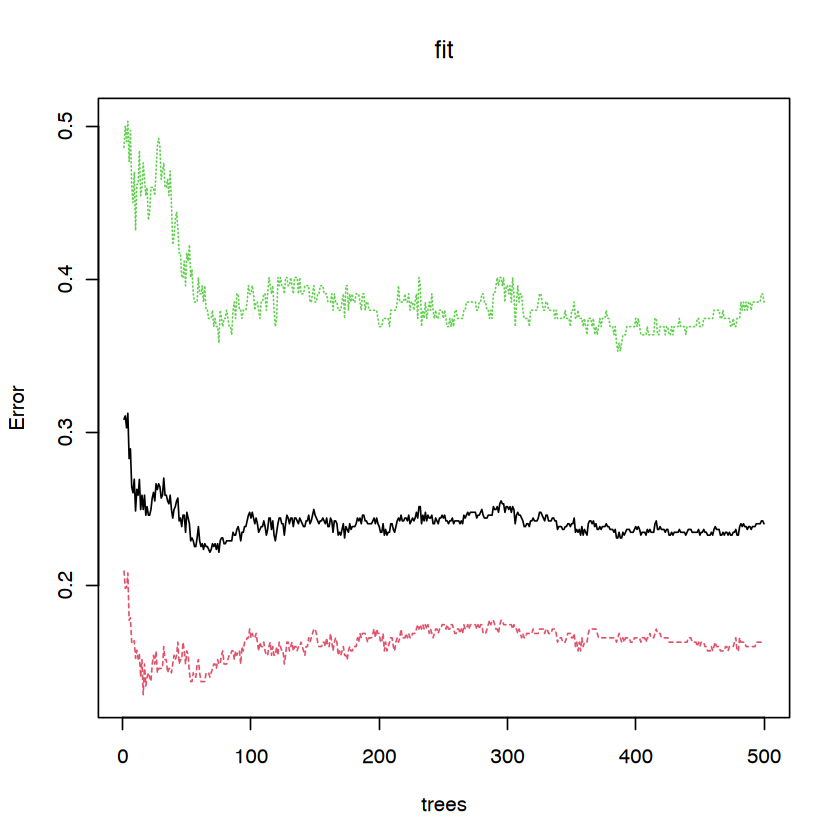

In [6]:
plot(fit)

In [7]:
which.min(fit$err.rate[,1])

[1] 68

In [8]:
randomForest::importance(fit)

,pos,neg,MeanDecreaseAccuracy,MeanDecreaseGini
pregnant,5.2301300,2.753965,5.909879,15.95584
glucose,27.8500873,22.515715,34.492147,50.50643
pressure,0.5338276,-2.316452,-1.330569,17.69235
triceps,8.5602505,2.169369,8.177569,24.39237
insulin,20.8247361,21.991061,30.346424,51.21499
mass,6.7756950,19.888795,19.807578,35.27363
pedigree,1.7546207,4.030553,3.783809,23.87699
age,4.9375821,9.579948,10.287846,23.99953


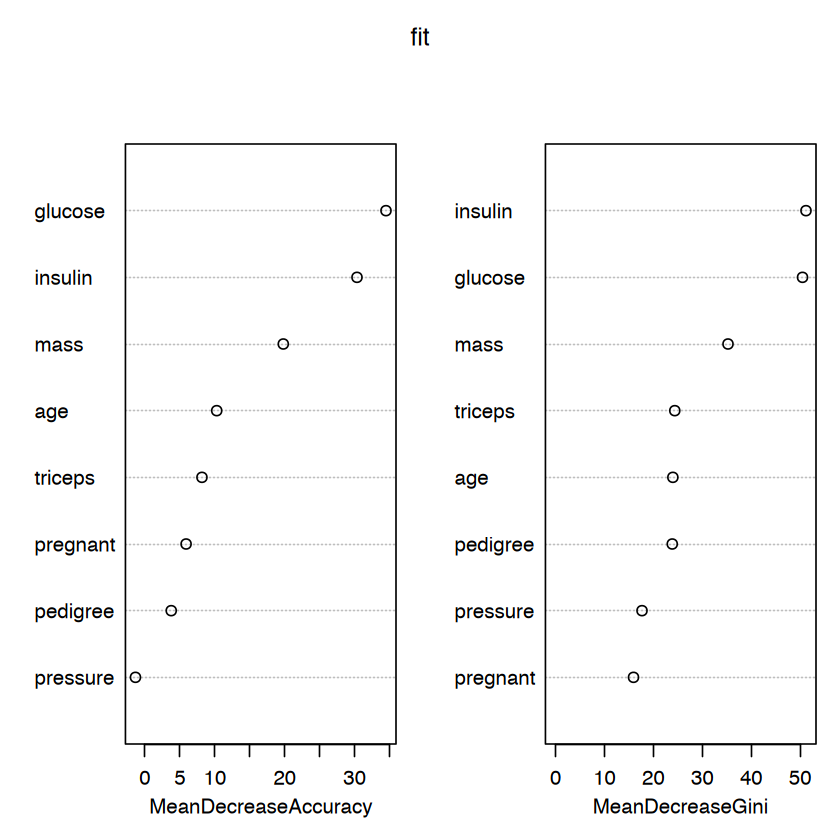

In [9]:
varImpPlot(fit)

Loading required package: randomForestSRC


 randomForestSRC 3.3.3 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 




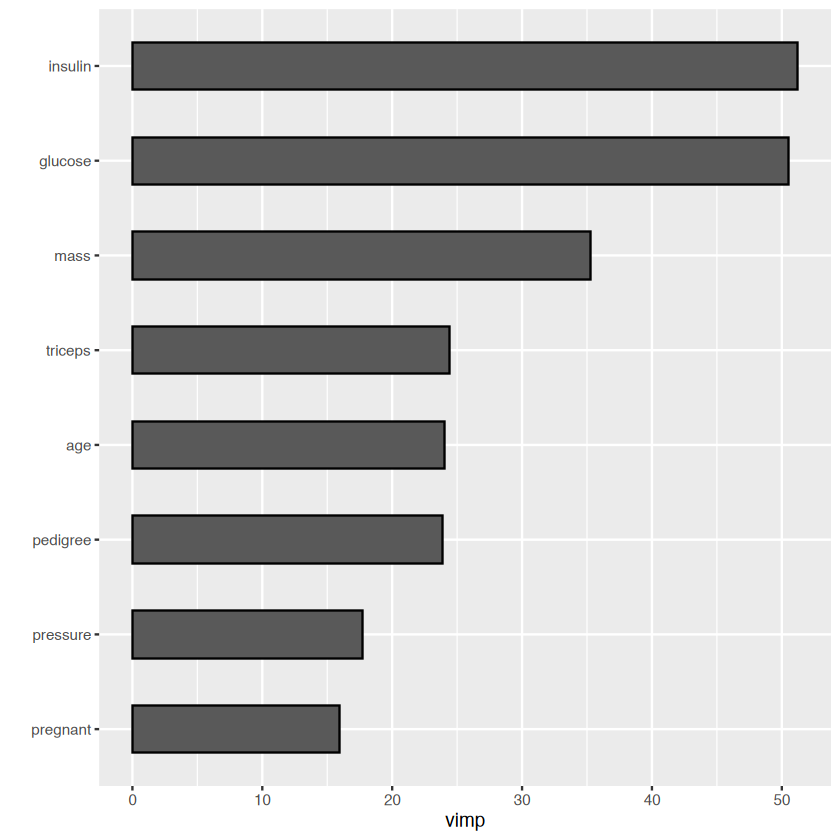

In [11]:
library(ggRandomForests)
gg_dta <- gg_vimp(fit)
plot(gg_dta) #MeanDecreaseGini


Attaching package: 'vip'


The following object is masked from 'package:utils':

    vi




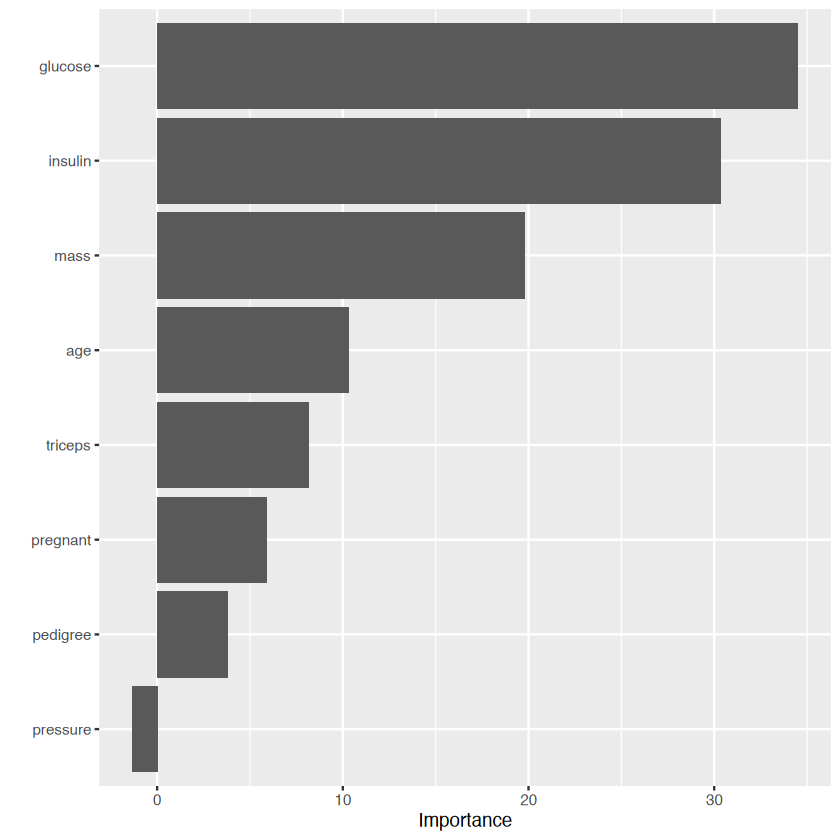

In [13]:
library(vip)

vip(fit) #MeanDecreaseAccuracy

In [14]:
getTree(fit, k=2)

,left daughter,right daughter,split var,split point,status,prediction
1,2,3,5,143.3000,1,0
2,4,5,1,14.0000,1,0
3,6,7,1,6.5000,1,0
4,8,9,5,123.6000,1,0
5,0,0,0,0.0000,-1,2
6,10,11,7,0.2135,1,0
7,12,13,3,61.0000,1,0
8,14,15,6,48.3500,1,0
9,16,17,4,43.5000,1,0
10,18,19,3,67.9250,1,0


In [15]:
fit1 <- randomForest(diabetes ~ ., data = train, ntree = 55)
fit1


Call:
 randomForest(formula = diabetes ~ ., data = train, ntree = 55) 
               Type of random forest: classification
                     Number of trees: 55
No. of variables tried at each split: 2

        OOB estimate of  error rate: 26.07%
Confusion matrix:
    pos neg class.error
pos 289  61   0.1742857
neg  79 108   0.4224599

In [16]:
pred <- predict(fit1, newdata = test)
head(pred)

1   3   4   9  15  17 
neg pos pos neg pos neg 
Levels: pos neg

In [17]:
caret::confusionMatrix(test$diabetes, pred)

Confusion Matrix and Statistics

          Reference
Prediction pos neg
       pos 128  22
       neg  29  52
                                         
               Accuracy : 0.7792         
                 95% CI : (0.7201, 0.831)
    No Information Rate : 0.6797         
    P-Value [Acc > NIR] : 0.0005417      
                                         
                  Kappa : 0.5054         
                                         
 Mcnemar's Test P-Value : 0.4008142      
                                         
            Sensitivity : 0.8153         
            Specificity : 0.7027         
         Pos Pred Value : 0.8533         
         Neg Pred Value : 0.6420         
             Prevalence : 0.6797         
         Detection Rate : 0.5541         
   Detection Prevalence : 0.6494         
      Balanced Accuracy : 0.7590         
                                         
       'Positive' Class : pos            
                                         

In [18]:
# 计算预测概率，准备绘制ROC曲线
pred <- predict(fit1, newdata = test, type = "prob")
head(pred)

,pos,neg
1,0.3454545,0.6545455
3,0.5454545,0.4545455
4,1.0000000,0.0000000
9,0.2363636,0.7636364
15,0.5818182,0.4181818
17,0.3818182,0.6181818


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Setting levels: control = pos, case = neg

Setting direction: controls > cases




Call:
roc.default(response = test$diabetes, predictor = as.matrix(pred)[,     1])

Data: as.matrix(pred)[, 1] in 150 controls (test$diabetes pos) > 81 cases (test$diabetes neg).
Area under the curve: 0.8553

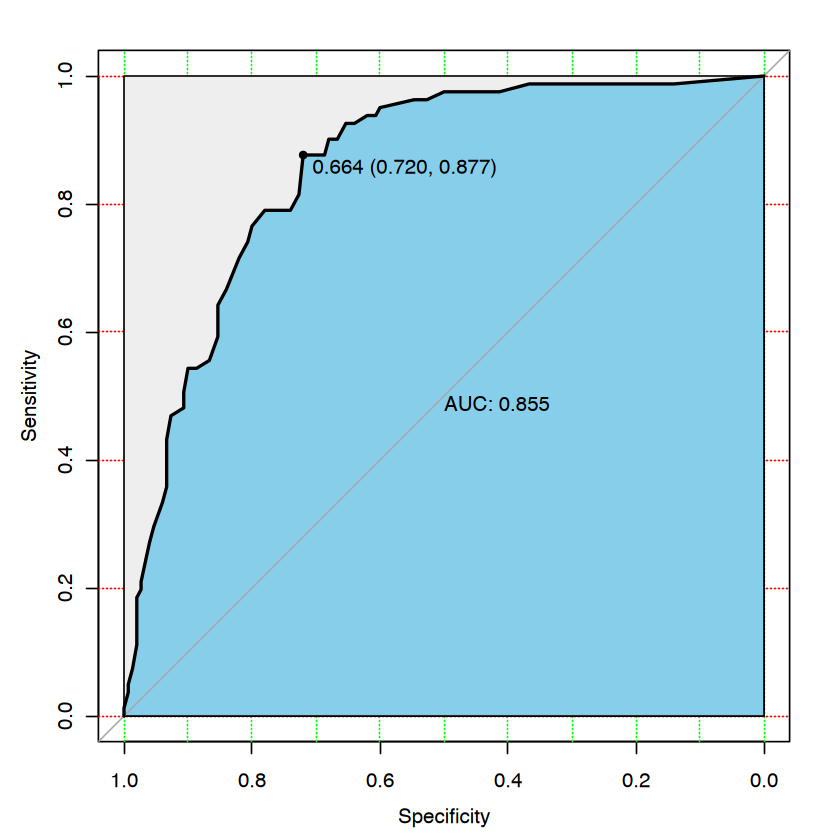

In [19]:
library(pROC)

# 提供真实结果，预测概率
rocc <- roc(test$diabetes, as.matrix(pred)[,1])
rocc
## 
## Call:
## roc.default(response = test$diabetes, predictor = as.matrix(pred)[,     1])
## 
## Data: as.matrix(pred)[, 1] in 150 controls (test$diabetes pos) > 81 cases (test$diabetes neg).
## Area under the curve: 0.8438

plot(rocc, 
     print.auc=TRUE, 
     auc.polygon=TRUE, 
     max.auc.polygon=TRUE, 
     auc.polygon.col="skyblue", 
     grid=c(0.1, 0.2), 
     grid.col=c("green", "red"), 
     print.thres=TRUE)

Setting levels: control = pos, case = neg

Setting direction: controls > cases




Call:
roc.default(response = train$diabetes, predictor = as.matrix(pred_train)[,     1])

Data: as.matrix(pred_train)[, 1] in 350 controls (train$diabetes pos) > 187 cases (train$diabetes neg).
Area under the curve: 1

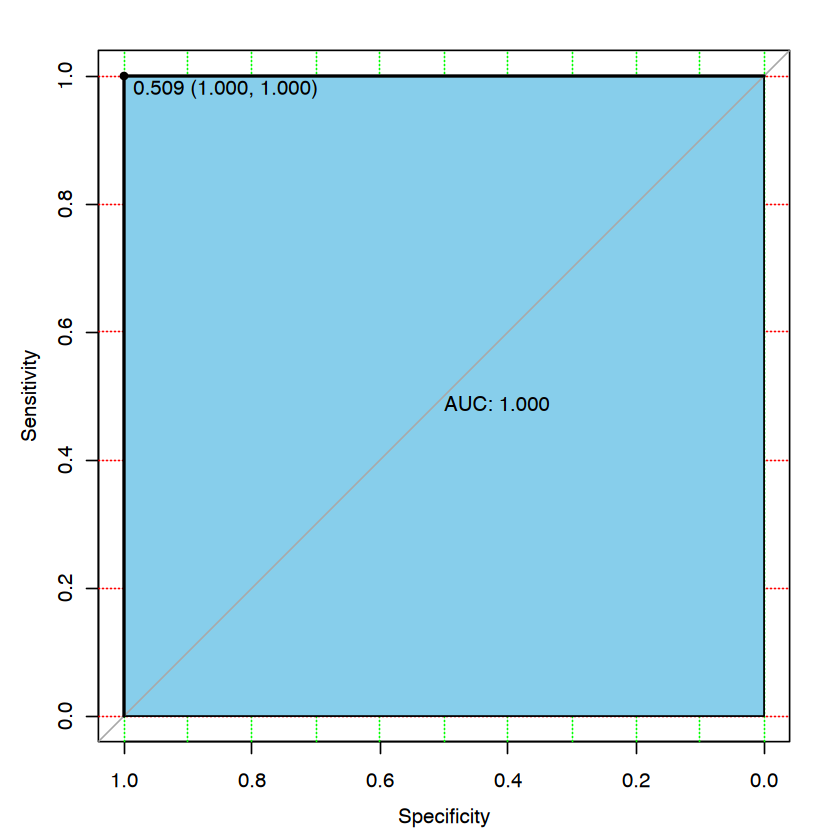

In [20]:
# 也是先计算预测概率
pred_train <- predict(fit1, newdata = train, type = "prob")

library(pROC)
# 提供真实结果，预测概率
rocc <- roc(train$diabetes, as.matrix(pred_train)[,1])
rocc
## 
## Call:
## roc.default(response = train$diabetes, predictor = as.matrix(pred_train)[,     1])
## 
## Data: as.matrix(pred_train)[, 1] in 350 controls (train$diabetes pos) > 187 cases (train$diabetes neg).
## Area under the curve: 1

plot(rocc, 
     print.auc=TRUE, 
     auc.polygon=TRUE, 
     max.auc.polygon=TRUE, 
     auc.polygon.col="skyblue", 
     grid=c(0.1, 0.2), 
     grid.col=c("green", "red"), 
     print.thres=TRUE)

## 超参数调优

mtry = 2  OOB error = 24.21% 
Searching left ...
mtry = 1 	OOB error = 24.39% 
-0.007692308 0.05 
Searching right ...
mtry = 4 	OOB error = 24.77% 
-0.02307692 0.05 


,mtry,OOBError
1.OOB,1,0.2439479
2.OOB,2,0.2420857
4.OOB,4,0.2476723


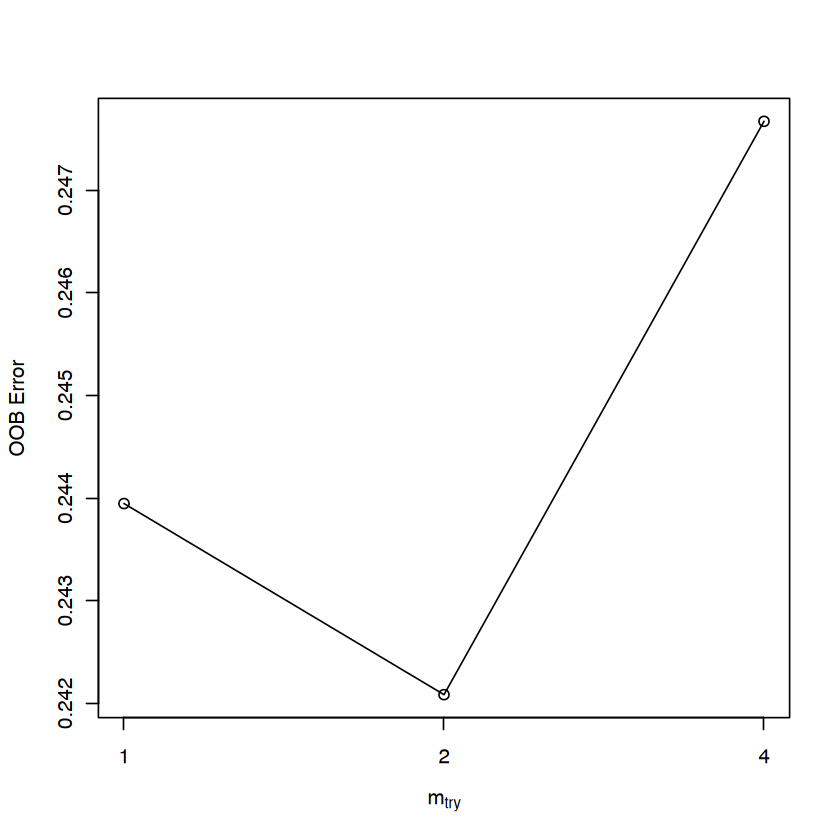

In [21]:
tuneRF(x = train[,-9], y = train$diabetes)

In [22]:
library(e1071)

tune_res <- tune.randomForest(x = train[,-9], y = train$diabetes,
                  nodesize = c(1:3),
                  mtry = c(2,4,6,8),
                  ntree = 500
                  )
#save(tune_res,file = "datasets/tune_res.rdata")


Attaching package: 'e1071'


The following objects are masked from 'package:randomForestSRC':

    impute, tune




# GBM

## 准备数据

In [26]:
rm(list=ls())

load(file="data/pimadiabetes.rdata")
pimadiabetes$diabetes <- ifelse(pimadiabetes$diabetes == "pos", 1, 0)

set.seed(123)
ind <- sample(1:nrow(pimadiabetes), size=0.7*nrow(pimadiabetes))

train <- pimadiabetes[ind, ]
test <- pimadiabetes[-ind, ]

dim(train)
dim(test)


[1] 537   9

[1] 231   9

## 模型拟合

In [27]:
library(gbm)

In [28]:
set.seed(123)
gbm1 <- gbm(
  formula = diabetes ~ .,
  data = train,
  distribution = "bernoulli", # 回归数据选"gaussian"
  n.trees = 100,
  shrinkage = 0.1,
  interaction.depth = 3,
  n.minobsinnode = 10,
  cv.folds = 10,
  train.fraction = 0.7
)

gbm1

gbm(formula = diabetes ~ ., distribution = "bernoulli", data = train, 
    n.trees = 100, interaction.depth = 3, n.minobsinnode = 10, 
    shrinkage = 0.1, train.fraction = 0.7, cv.folds = 10)
A gradient boosted model with bernoulli loss function.
100 iterations were performed.
The best cross-validation iteration was 21.
The best test-set iteration was 32.
There were 8 predictors of which 8 had non-zero influence.

## 结果探索

In [29]:
head(gbm1$fit)
## [1] -0.5306145  1.4316161  0.3399815  4.7168734  3.5942364  3.1978575
length(gbm1$fit)
## [1] 537

[1] -0.4732662  2.1102119  1.0230908  4.1529676  3.5588554  3.2963535

[1] 537

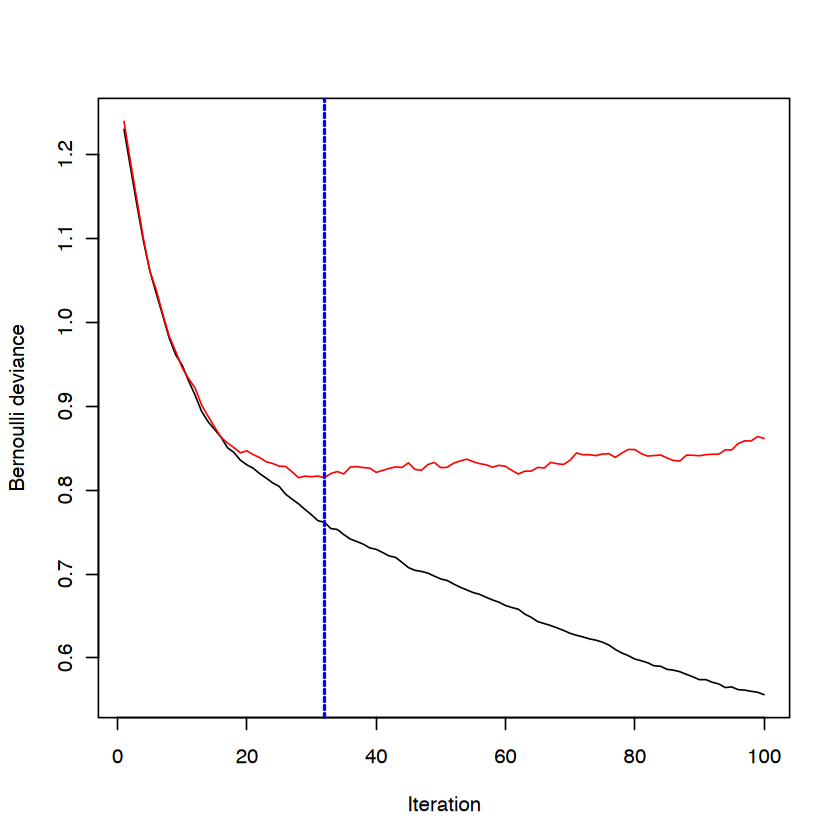

In [30]:
# 使用0.3的测试集,train.fraction = 0.7
best.iter <- gbm.perf(gbm1, method = "test")

In [31]:
print(best.iter)

[1] 32


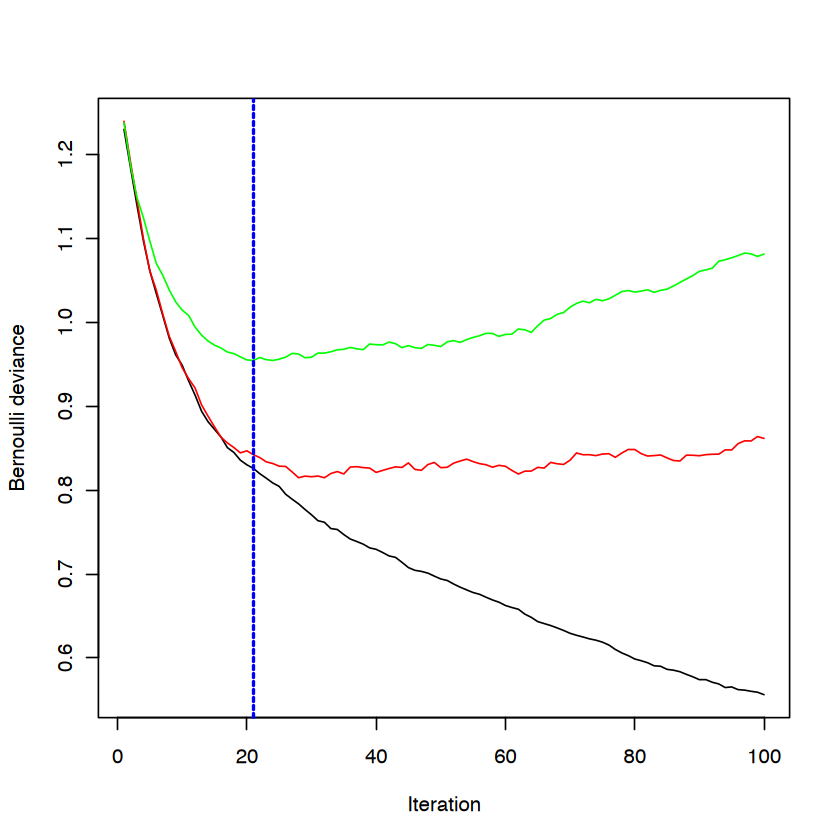

In [32]:
# plot error curve
best.iter <- gbm.perf(gbm1, method = "cv")

In [33]:
print(best.iter)
## [1] 29

[1] 21


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



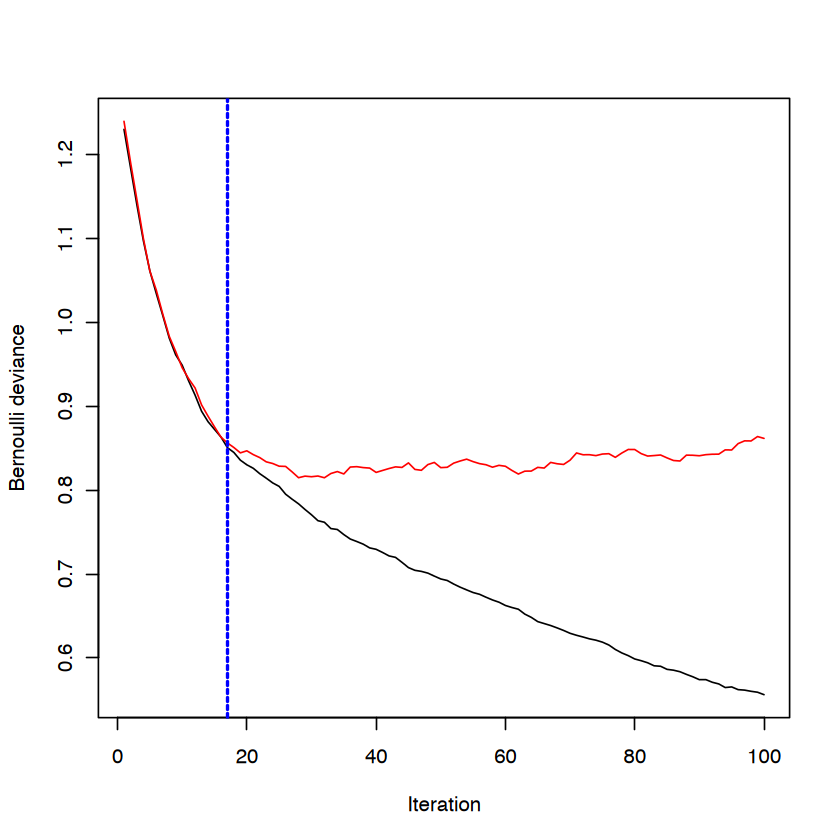

In [34]:
best.iter <- gbm.perf(gbm1, method = "OOB")
## OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.

In [35]:

print(best.iter)
## [1] 18
## attr(,"smoother")
## Call:
## loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
##     length(x)/10), 50))
## 
## Number of Observations: 100 
## Equivalent Number of Parameters: 8.32 
## Residual Standard Error: 0.001453

[1] 17
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.001754 


,var,rel.inf
,<chr>,<dbl>
insulin,insulin,62.539578
mass,mass,27.779347
triceps,triceps,9.681075
pregnant,pregnant,0.000000
glucose,glucose,0.000000
pressure,pressure,0.000000
pedigree,pedigree,0.000000
age,age,0.000000


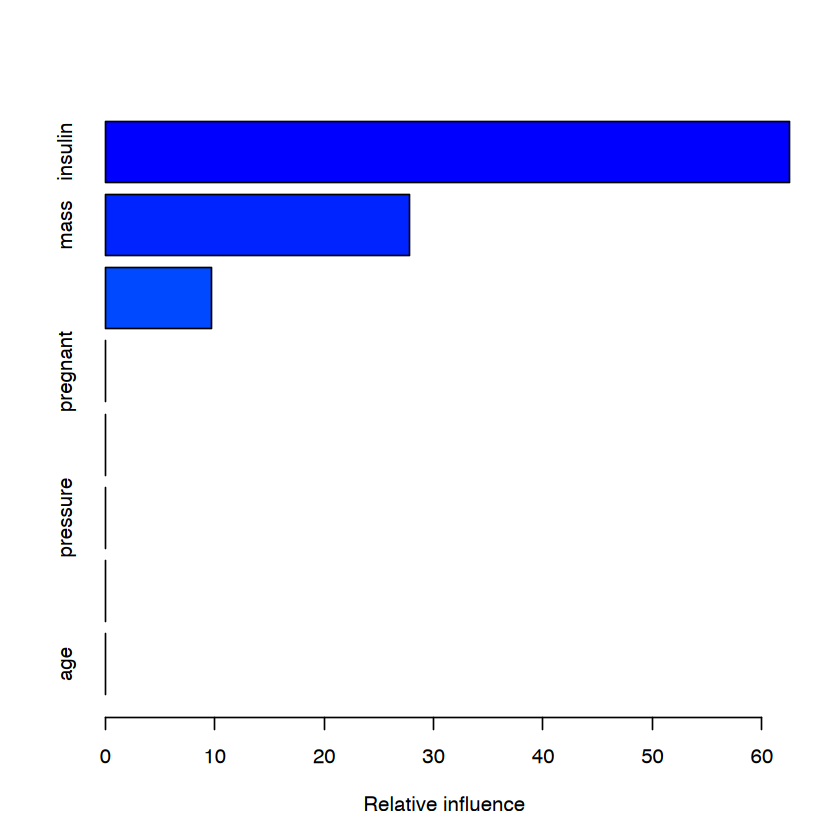

In [36]:
summary(gbm1, n.trees = 1)  # 使用1棵树

,var,rel.inf
,<chr>,<dbl>
insulin,insulin,32.170529
glucose,glucose,21.658967
mass,mass,17.589525
age,age,12.036929
pedigree,pedigree,7.776208
pregnant,pregnant,4.067364
triceps,triceps,2.877502
pressure,pressure,1.822977


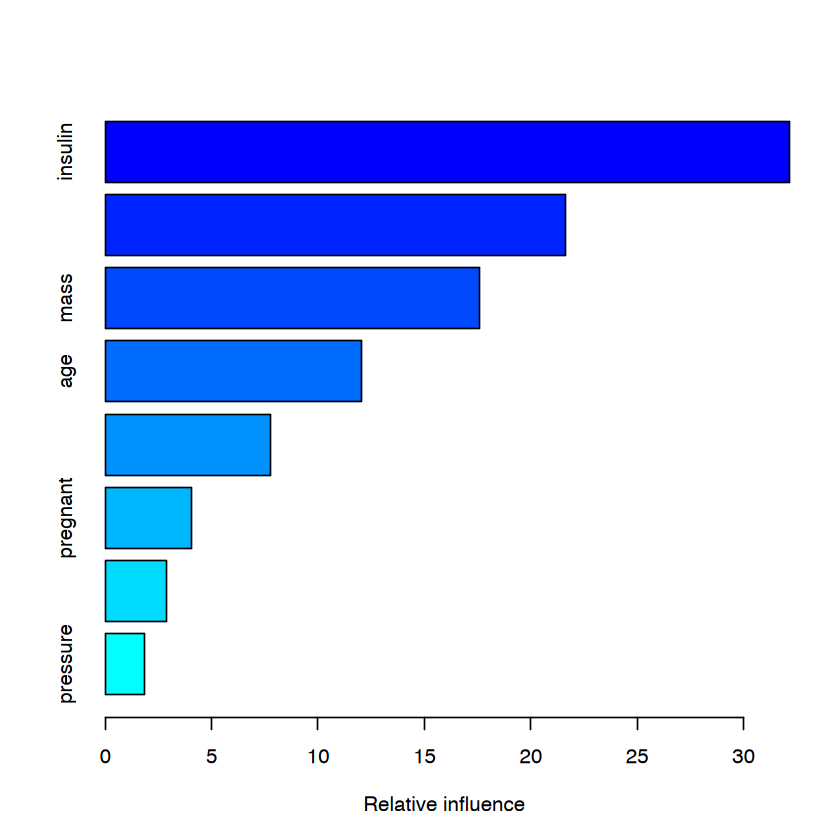

In [37]:
summary(gbm1, n.trees = 29)  

In [38]:
print(pretty.gbm.tree(gbm1, i.tree = 1)) # 选择第一棵树

  SplitVar SplitCodePred LeftNode RightNode MissingNode ErrorReduction Weight
0        4 155.500000000        1         5           9      11.689430    187
1        3  28.170000000        2         3           4       1.809514    109
2       -1   0.132597083       -1        -1          -1       0.000000     67
3       -1   0.015277665       -1        -1          -1       0.000000     42
4       -1   0.087391436       -1        -1          -1       0.000000    109
5        5  29.050000000        6         7           8       5.192308     78
6       -1   0.118351586       -1        -1          -1       0.000000     13
7       -1  -0.188435359       -1        -1          -1       0.000000     65
8       -1  -0.137304202       -1        -1          -1       0.000000     78
9       -1  -0.006331878       -1        -1          -1       0.000000    187
    Prediction
0 -0.006331878
1  0.087391436
2  0.132597083
3  0.015277665
4  0.087391436
5 -0.137304202
6  0.118351586
7 -0.188435359
8 -0.13

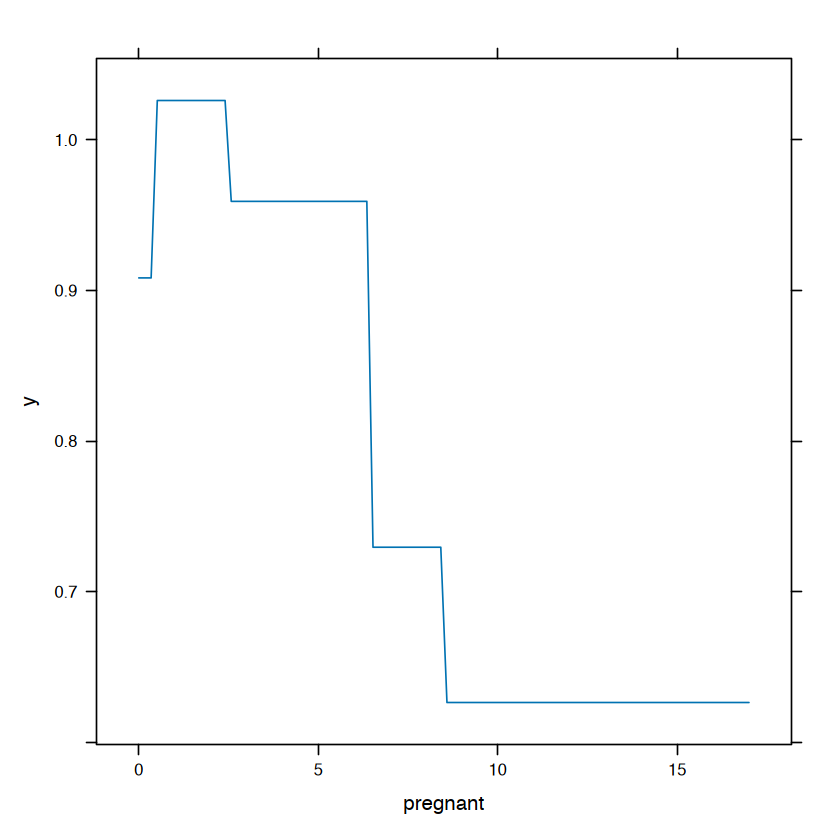

In [39]:
plot(gbm1, i.var = 1, n.trees = 29)

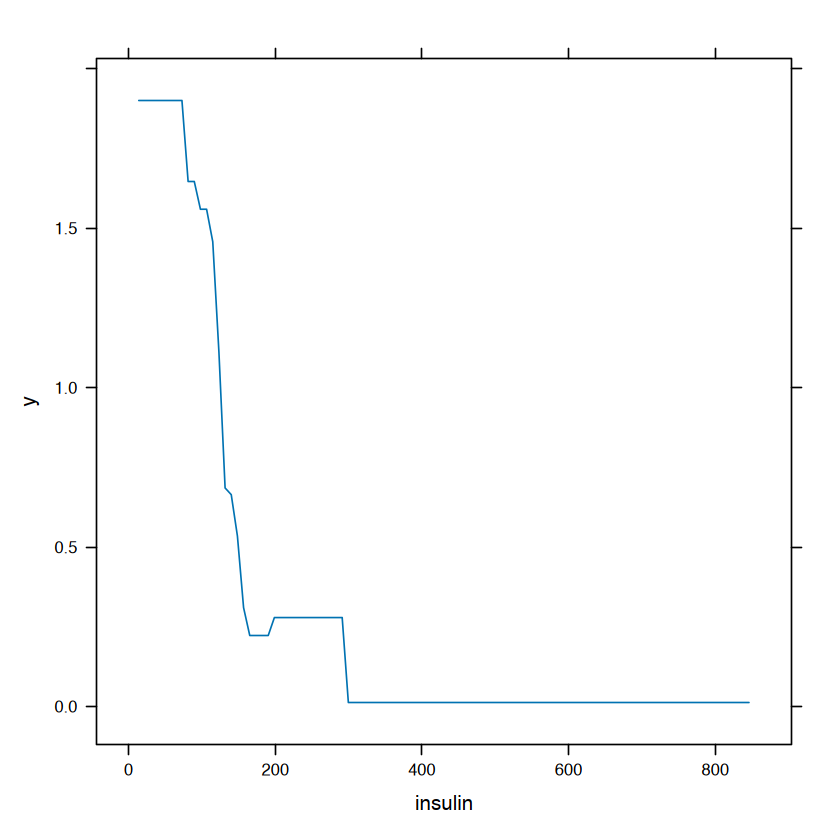

In [40]:
plot(gbm1, i.var = "insulin", n.trees = 29)

# XGBoost

## 准备数据

In [41]:
library(xgboost)

rm(list = ls())
# load data
data(agaricus.train, package='xgboost')
data(agaricus.test, package='xgboost')
train <- agaricus.train
test <- agaricus.test

str(train)

List of 2
 $ data :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:143286] 2 6 8 11 18 20 21 24 28 32 ...
  .. ..@ p       : int [1:127] 0 369 372 3306 5845 6489 6513 8380 8384 10991 ...
  .. ..@ Dim     : int [1:2] 6513 126
  .. ..@ Dimnames:List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:126] "cap-shape=bell" "cap-shape=conical" "cap-shape=convex" "cap-shape=flat" ...
  .. ..@ x       : num [1:143286] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ label: num [1:6513] 1 0 0 1 0 0 0 1 0 0 ...


In [42]:
str(test)

List of 2
 $ data :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:35442] 0 2 7 11 13 16 20 22 27 31 ...
  .. ..@ p       : int [1:127] 0 83 84 806 1419 1603 1611 2064 2064 2701 ...
  .. ..@ Dim     : int [1:2] 1611 126
  .. ..@ Dimnames:List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:126] "cap-shape=bell" "cap-shape=conical" "cap-shape=convex" "cap-shape=flat" ...
  .. ..@ x       : num [1:35442] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ label: num [1:1611] 0 1 0 0 0 0 1 0 1 0 ...


In [43]:
class(train$data)

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

In [45]:
# 查看数据维度,6513行，126列
dim(train$data)
## [1] 6513  126

table(train$label)

[1] 6513  126


   0    1 
3373 3140 